In [844]:
import pandas as pd
from unidecode import unidecode
import unicodedata

In [845]:
df = pd.read_csv('data/tracks.csv', parse_dates=['release_date'])

In [846]:
# Tratando a string como lista e pegando o primeiro artista principal
from ast import literal_eval
df['artist'] = df['artists'].apply(lambda x: literal_eval(x)[0])

In [847]:
# Remove dados fantasma
df = df[df['name'].notna()]

In [848]:
entries = pd.read_csv('data/billboard_hot_100_definitive.csv', parse_dates=['date'])

In [849]:
def is_latin(s):
    for c in s:
        if c.isascii():  # checks for numbers, English letters, spaces, and punctuation
            continue
        try:
            if 'LATIN' not in unicodedata.name(c):
                return False
        except ValueError:
            return False
    return True

In [850]:
# Remove dados com música não em alfabeto latino
df = df[df['name'].apply(is_latin)]


In [851]:
# Remove acentos e caracteres especiais
df['name'] = df['name'].apply(unidecode)
df['artist'] = df['artist'].apply(unidecode)

<Axes: >

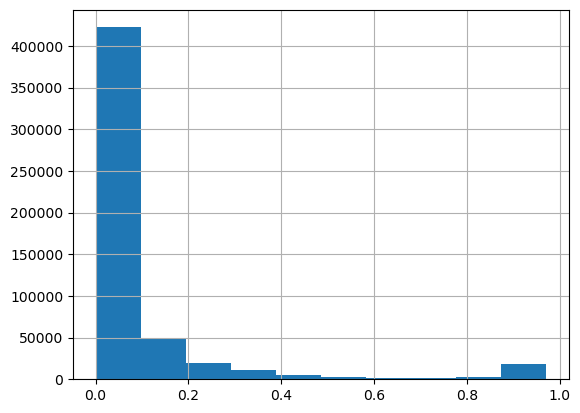

In [852]:
df['speechiness'].hist()

<Axes: >

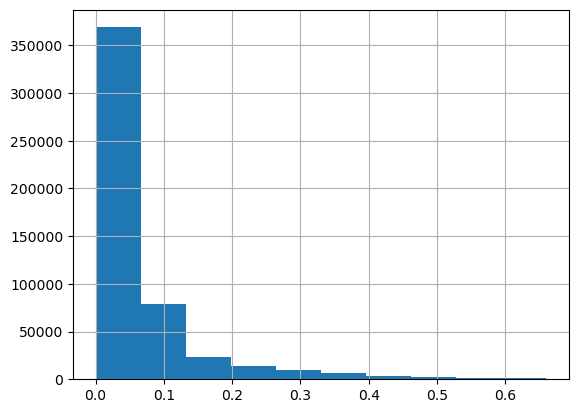

In [853]:
df = df[df['speechiness'] <= 0.66]
df['speechiness'].hist()

In [854]:
billboard = entries.sort_values('date', ascending=False)
billboard['cumulative_artist_appearances'] = billboard.groupby('artist').cumcount(ascending=False)
billboard = billboard.sort_values(by=['date'], ascending=False).drop_duplicates(['name', 'artist'], keep='last')
billboard.loc[billboard['artist'] == 'Big Time Rush']

,name,artist,rank,weeks,date,cumulative_artist_appearances
49496,Windows Down,Big Time Rush,97,1,2012-07-14,13
56478,Boyfriend,Big Time Rush,79,1,2011-03-12,2
57278,Big Night,Big Time Rush,79,1,2011-01-15,1
60792,Halfway There,Big Time Rush,93,1,2010-05-15,0


In [855]:
# Por alguma razão, algumas músicas aparecem repetidas diversas vezes com 
# variações mínimas nas features de audio, portanto é necessario filtra-las
new_df = df.sort_values(by='release_date').drop_duplicates(['name', 'artist'], keep='first')
new_df.loc[(df['artist'] == 'Big Time Rush')][['name', 'artist', 'release_date']]

,name,artist,release_date
84002,Any Kind of Guy,Big Time Rush,2010-02-02
156379,Big Time Rush,Big Time Rush,2010-04-09
397551,Halfway There,Big Time Rush,2010-04-27
397586,Famous,Big Time Rush,2010-06-29
397592,City Is Ours,Big Time Rush,2010-08-03
468010,Count On You (feat. Jordin Sparks),Big Time Rush,2010-10-11
119209,Til I Forget About You,Big Time Rush,2010-10-11
119203,Boyfriend,Big Time Rush,2010-10-11
119206,Worldwide,Big Time Rush,2010-10-11
468101,If I Ruled the World (feat. Iyaz),Big Time Rush,2011-01-01


In [856]:
new_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,19,233920,0,['Los Pincheira del Sur'],['1BnQrx8p0bHBpidjIGq26z'],1900-01-01,0.659,0.791,...,-4.895,1,0.0295,0.13900,0.000002,0.161,0.956,141.999,4,Los Pincheira del Sur
132326,1Jl19I7NAHgnvrlg6HIzK9,Help me,0,177367,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.358,0.456,...,-4.728,1,0.0380,0.57500,0.000003,0.340,0.317,120.169,4,Abe Lyman's Orchestra
132354,3IshNqd3sMjHvtj97sUtyB,Hullabaloo,0,167963,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.842,0.720,...,-6.756,1,0.0817,0.96100,0.242000,0.265,0.842,119.110,4,Abe Lyman's Orchestra
132355,3KfDZww1OqQK8yUiYpSkyX,Jeannine,0,176218,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,0.146,0.635,...,-7.811,0,0.0458,0.99000,0.797000,0.524,0.443,83.640,4,Abe Lyman's Orchestra
132356,3MgGOqoHw1N0TQaL8gAoI3,On the Alamo,0,207177,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922-01-01,0.280,0.482,...,-5.019,1,0.0351,0.99500,0.770000,0.234,0.520,175.163,4,Isham Jones & His Orchestra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188863,1NCLXNEEpUtSV8eS7me71G,Tu Verdad,0,205120,0,['J Balvin'],['1vyhD5VmyZ7KMfW5gqLgo5'],2021-04-16,0.777,0.642,...,-6.657,0,0.0566,0.17600,0.000015,0.178,0.589,115.930,4,J Balvin
94264,43H6Jrn6CIa7xnfKL79vE6,This Time Around,0,162820,0,['Wiz Khalifa'],['137W8MRPWKqSmrBGDBFSop'],2021-04-16,0.775,0.656,...,-4.724,0,0.0732,0.09990,0.000001,0.142,0.755,157.010,4,Wiz Khalifa
188822,54TI5Pf1OG2sEEPebJVr88,Catching Feelings,0,234680,0,['Justin Bieber'],['1uNFoZAHBGtllmzznpCI3s'],2021-04-16,0.325,0.541,...,-6.665,1,0.0414,0.35300,0.000000,0.350,0.363,85.169,4,Justin Bieber
94240,7uHMx3E8in607GoKRv1Kcx,Spicy,0,143375,0,"['Ty Dolla $ign', 'Post Malone']","['7c0XG5cIJTrrAgEC3ULPiq', '246dkjvS1zLTtiykXe...",2021-04-16,0.782,0.510,...,-5.724,0,0.0419,0.14300,0.000000,0.115,0.118,99.993,4,Ty Dolla $ign


## Construção da feature de aparições prévias de um artista no lançamento da música

In [857]:
# merged_df = pd.merge(df, sanitized_entries, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity','time_signature']).drop_duplicates(['name', 'artist'], keep='first').reset_index(drop=True)
merged_df = pd.merge(new_df, billboard, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity']).reset_index(drop=True)
merged_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,Maldita sea la primera vez,233920,0,1900-01-01,0.659,0.791,2,-4.895,1,0.0295,...,0.000002,0.161,0.956,141.999,4,Los Pincheira del Sur,NaN,NaN,NaT,NaN
1,Help me,177367,0,1922-01-01,0.358,0.456,3,-4.728,1,0.0380,...,0.000003,0.340,0.317,120.169,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
2,Hullabaloo,167963,0,1922-01-01,0.842,0.720,3,-6.756,1,0.0817,...,0.242000,0.265,0.842,119.110,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
3,Jeannine,176218,0,1922-01-01,0.146,0.635,8,-7.811,0,0.0458,...,0.797000,0.524,0.443,83.640,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
4,On the Alamo,207177,0,1922-01-01,0.280,0.482,9,-5.019,1,0.0351,...,0.770000,0.234,0.520,175.163,4,Isham Jones & His Orchestra,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451305,Tu Verdad,205120,0,2021-04-16,0.777,0.642,11,-6.657,0,0.0566,...,0.000015,0.178,0.589,115.930,4,J Balvin,NaN,NaN,NaT,NaN
451306,This Time Around,162820,0,2021-04-16,0.775,0.656,6,-4.724,0,0.0732,...,0.000001,0.142,0.755,157.010,4,Wiz Khalifa,NaN,NaN,NaT,NaN
451307,Catching Feelings,234680,0,2021-04-16,0.325,0.541,3,-6.665,1,0.0414,...,0.000000,0.350,0.363,85.169,4,Justin Bieber,NaN,NaN,NaT,NaN
451308,Spicy,143375,0,2021-04-16,0.782,0.510,4,-5.724,0,0.0419,...,0.000000,0.115,0.118,99.993,4,Ty Dolla $ign,53.0,1.0,2020-11-07,68.0


In [858]:
# Pega todas as entradas que não são nulas
billboard_entries_df = merged_df[~merged_df['weeks'].isna()].reset_index(drop=True)
billboard_entries_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.180,2,-10.083,1,0.0360,...,0.004770,0.2260,0.350,172.680,3,Frank Sinatra,78.0,1.0,1961-10-16,57.0
1,White Christmas,177480,0,1942-01-01,0.317,0.158,9,-16.485,1,0.0381,...,0.353000,0.3380,0.247,130.503,3,Bing Crosby,86.0,1.0,1958-12-22,0.0
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,9,-12.990,0,0.0932,...,0.000011,0.1030,0.493,79.855,4,Bill Withers,88.0,1.0,1971-07-17,0.0
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,3,-12.431,1,0.0935,...,0.000000,0.2840,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,4,-16.084,0,0.0321,...,0.000000,0.2560,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10152,Press,143792,0,2021-04-16,0.886,0.530,1,-5.738,1,0.3100,...,0.000018,0.1500,0.197,133.845,4,Cardi B,16.0,1.0,2019-06-15,165.0
10153,Relationship,215307,0,2021-04-16,0.841,0.595,2,-6.337,1,0.0624,...,0.000000,0.1200,0.300,145.995,4,Young Thug,83.0,1.0,2017-07-08,59.0
10154,Hot,193027,0,2021-04-16,0.855,0.651,0,-8.044,0,0.2340,...,0.000000,0.0772,0.559,111.992,4,Young Thug,26.0,1.0,2019-08-31,79.0
10155,Spicy,143375,0,2021-04-16,0.782,0.510,4,-5.724,0,0.0419,...,0.000000,0.1150,0.118,99.993,4,Ty Dolla $ign,53.0,1.0,2020-11-07,68.0


In [859]:
billboard_entries_df.loc[billboard_entries_df['artist'] == 'Big Time Rush']

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
8148,Halfway There,205760,0,2010-04-27,0.481,0.925,3,-2.861,1,0.102,...,0.0,0.1200,0.318,143.079,4,Big Time Rush,93.0,1.0,2010-05-15,0.0
8184,Boyfriend,201040,0,2010-10-11,0.614,0.857,1,-4.171,0,0.111,...,0.0,0.1770,0.677,164.146,4,Big Time Rush,79.0,1.0,2011-03-12,2.0
8257,Windows Down,192933,0,2011-01-01,0.619,0.931,11,-3.440,0,0.068,...,0.0,0.0996,0.820,129.957,4,Big Time Rush,97.0,1.0,2012-07-14,13.0


In [860]:
billboard_entries_df.loc[billboard_entries_df['artist'] == 'BTS']

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
9469,DNA,223123,0,2017-09-18,0.598,0.775,1,-4.035,0,0.0545,...,0.0,0.0677,0.687,129.819,4,BTS,85.0,1.0,2017-10-07,0.0
9470,MIC Drop,238193,0,2017-09-18,0.667,0.889,6,-4.851,1,0.0918,...,0.0,0.0816,0.541,169.959,4,BTS,28.0,1.0,2017-12-16,4.0
9648,IDOL,222732,0,2018-08-24,0.734,0.855,9,-3.211,1,0.1180,...,0.0,0.1230,0.422,126.035,4,BTS,11.0,1.0,2018-09-08,19.0
9751,Make It Right,226321,0,2019-04-12,0.638,0.703,7,-7.874,1,0.4440,...,0.0,0.1320,0.261,105.766,4,BTS,95.0,1.0,2019-04-27,23.0
9906,Black Swan,198261,0,2020-01-17,0.719,0.758,2,-5.167,0,0.0851,...,0.0,0.1290,0.490,147.023,4,BTS,57.0,1.0,2020-02-01,32.0
9921,My Time,234458,0,2020-02-21,0.674,0.640,0,-5.139,0,0.0339,...,0.0,0.0925,0.664,99.908,4,BTS,84.0,1.0,2020-03-07,34.0
9923,ON,246381,0,2020-02-21,0.583,0.817,9,-5.146,0,0.0987,...,0.0,0.3380,0.438,105.936,4,BTS,4.0,1.0,2020-03-07,33.0
9924,Filter,180221,0,2020-02-21,0.781,0.762,10,-5.188,0,0.0626,...,0.0,0.1210,0.860,110.042,4,BTS,87.0,1.0,2020-03-07,35.0
10027,Dynamite,199054,0,2020-08-28,0.746,0.765,6,-4.410,0,0.0993,...,0.0,0.0936,0.737,114.044,4,BTS,1.0,1.0,2020-09-05,37.0
10057,Life Goes On,207481,0,2020-11-20,0.566,0.716,1,-5.733,1,0.0424,...,0.0,0.3700,0.450,81.068,4,BTS,1.0,1.0,2020-12-05,53.0


#### Adição de first_success_date

In [733]:
billboard_entries_df = billboard_entries_df.sort_values(by=['artist', 'cumulative_artist_appearances'], ascending=False)
billboard_entries_df['previous_artist'] = billboard_entries_df['artist'].shift(-1)
billboard_entries_df['first_success_date'] = billboard_entries_df.groupby('artist')['date'].transform('min')
# billboard_entries_df = billboard_entries_df[['name', 'artist', 'release_date', 'date', 'cumulative_artist_appearances', 'previous_artist', 'first_success_date']].sort_values(by=['date'], ascending=False)
billboard_entries_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances,previous_artist,first_success_date
8636,Feelin' Myself,253547,1,2013-01-01,0.859,0.533,6,-8.590,0,0.1560,...,0.514,96.453,4,will.i.am,96.0,1.0,2014-04-26,75.0,will.i.am,2007-08-25
8658,#thatPOWER,279507,0,2013-01-01,0.793,0.601,6,-6.036,0,0.0574,...,0.387,128.037,4,will.i.am,42.0,1.0,2013-04-06,50.0,will.i.am,2007-08-25
8655,Scream & Shout,283400,1,2013-01-01,0.772,0.685,5,-6.849,1,0.0696,...,0.501,130.033,4,will.i.am,12.0,1.0,2012-12-15,34.0,will.i.am,2007-08-25
8035,Check It Out,238160,0,2010-01-01,0.858,0.676,3,-4.835,0,0.0746,...,0.700,129.991,4,will.i.am,78.0,1.0,2010-09-25,11.0,will.i.am,2007-08-25
7481,I Got It From My Mama,241520,0,2007-01-01,0.888,0.777,6,-6.262,1,0.0505,...,0.876,118.998,4,will.i.am,93.0,1.0,2007-08-25,0.0,t.A.T.u.,2007-08-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,Smells Like Nirvana,225133,0,1992-01-01,0.596,0.760,6,-8.217,1,0.0715,...,0.731,120.701,4,"""Weird Al"" Yankovic",95.0,1.0,1992-04-25,39.0,"""Weird Al"" Yankovic",1983-04-30
4418,Fat,216067,0,1988-01-01,0.870,0.551,6,-10.563,0,0.0600,...,0.409,116.916,4,"""Weird Al"" Yankovic",99.0,1.0,1988-05-21,37.0,"""Weird Al"" Yankovic",1983-04-30
3634,I Lost On Jeopardy,208933,0,1984-01-01,0.887,0.769,0,-9.150,0,0.0497,...,0.836,113.262,4,"""Weird Al"" Yankovic",83.0,1.0,1984-06-30,26.0,"""Weird Al"" Yankovic",1983-04-30
3616,Eat It,201600,0,1984-01-01,0.751,0.768,7,-9.833,1,0.0979,...,0.881,147.658,4,"""Weird Al"" Yankovic",59.0,1.0,1984-03-10,8.0,"""Weird Al"" Yankovic",1983-04-30


In [734]:
def famous_before_release(row):
    if row['cumulative_artist_appearances'] > 0 and row['previous_artist'] == row['artist'] and row['first_success_date'] <= row['release_date']:
        return 1
    else:
        return 0

In [735]:
billboard_entries_df['famous_before_release'] = billboard_entries_df.apply(famous_before_release, axis=1)
# sanitized_billboard_entries_df.loc[sanitized_billboard_entries_df['artist'] == 'BTS'].sort_values('cumulative_artist_appearances', ascending=False)
billboard_entries_df.loc[billboard_entries_df['artist'] == 'Ariana Grande']

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances,previous_artist,first_success_date,famous_before_release
10051,pov,201882,0,2020-10-30,0.487,0.534,0,-5.664,0,0.0555,...,131.798,4,Ariana Grande,40.0,1.0,2020-11-14,459.0,Ariana Grande,2013-04-13,1
9721,NASA,182000,0,2019-02-08,0.747,0.458,6,-6.891,1,0.3030,...,75.029,4,Ariana Grande,17.0,1.0,2019-02-23,344.0,Ariana Grande,2013-04-13,1
9647,R.E.M,245667,1,2018-08-17,0.831,0.485,10,-6.677,0,0.1500,...,80.022,4,Ariana Grande,72.0,1.0,2018-09-01,263.0,Ariana Grande,2013-04-13,1
9208,Everyday,194840,1,2016-05-20,0.637,0.733,7,-4.413,0,0.0563,...,131.004,4,Ariana Grande,85.0,1.0,2017-03-04,222.0,Ariana Grande,2013-04-13,1
9163,Side To Side,226160,1,2016-04-01,0.650,0.736,6,-5.840,0,0.2290,...,159.174,4,Ariana Grande,31.0,1.0,2016-09-17,187.0,Ariana Grande,2013-04-13,1
9162,Into You,244453,0,2016-04-01,0.623,0.734,9,-5.950,1,0.1070,...,107.853,4,Ariana Grande,83.0,1.0,2016-05-28,160.0,Ariana Grande,2013-04-13,1
9209,Let Me Love You,223853,0,2016-05-20,0.527,0.435,2,-8.363,1,0.1290,...,102.698,3,Ariana Grande,99.0,1.0,2016-05-07,156.0,Ariana Grande,2013-04-13,1
9207,Be Alright,179293,0,2016-05-20,0.813,0.456,1,-7.667,0,0.0684,...,108.801,4,Ariana Grande,43.0,1.0,2016-04-09,150.0,Ariana Grande,2013-04-13,1
9164,Dangerous Woman,235947,0,2016-04-01,0.662,0.602,4,-5.369,0,0.0401,...,133.969,3,Ariana Grande,10.0,1.0,2016-04-02,149.0,Ariana Grande,2013-04-13,1
9085,Focus,211360,0,2015-10-30,0.671,0.876,6,-6.034,1,0.2390,...,100.016,4,Ariana Grande,7.0,1.0,2015-11-21,136.0,Ariana Grande,2013-04-13,1


## Final touches before prediction

In [861]:
# billboard_entries_df['famous_before_release'] = billboard_entries_df.apply(lambda x: 1 if x['cumulative_artist_appearances'] > 0 else 0, axis=1)
billboard_entries_df.loc[billboard_entries_df['artist'] == 'BTS'][['name', 'artist', 'cumulative_artist_appearances', 'release_date', 'date', 'famous_before_release']].sort_values('cumulative_artist_appearances', ascending=False)

KeyError: "['famous_before_release'] not in index"

In [818]:
billboard_entries_df.value_counts('famous_before_release')

KeyError: 'famous_before_release'

In [862]:
total_in_billboard = len(merged_df[~merged_df['weeks'].isna()])
total_in_billboard

10157

In [863]:
len(merged_df)

451310

In [864]:
unsuccessful_df = merged_df[merged_df['weeks'].isna()].reset_index(drop=True)
unsuccessful_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,Maldita sea la primera vez,233920,0,1900-01-01,0.659,0.791,2,-4.895,1,0.0295,...,0.000002,0.1610,0.956,141.999,4,Los Pincheira del Sur,NaN,NaN,NaT,NaN
1,Help me,177367,0,1922-01-01,0.358,0.456,3,-4.728,1,0.0380,...,0.000003,0.3400,0.317,120.169,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
2,Hullabaloo,167963,0,1922-01-01,0.842,0.720,3,-6.756,1,0.0817,...,0.242000,0.2650,0.842,119.110,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
3,Jeannine,176218,0,1922-01-01,0.146,0.635,8,-7.811,0,0.0458,...,0.797000,0.5240,0.443,83.640,4,Abe Lyman's Orchestra,NaN,NaN,NaT,NaN
4,On the Alamo,207177,0,1922-01-01,0.280,0.482,9,-5.019,1,0.0351,...,0.770000,0.2340,0.520,175.163,4,Isham Jones & His Orchestra,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441148,2013 Will Be My Year,161045,0,2021-04-16,0.347,0.965,10,-6.014,1,0.1420,...,0.000000,0.3430,0.392,90.987,4,Jay and Others :>,NaN,NaN,NaT,NaN
441149,Millions,157520,0,2021-04-16,0.942,0.531,1,-7.510,1,0.2150,...,0.000109,0.0812,0.739,99.027,4,Young Thug,NaN,NaN,NaT,NaN
441150,Tu Verdad,205120,0,2021-04-16,0.777,0.642,11,-6.657,0,0.0566,...,0.000015,0.1780,0.589,115.930,4,J Balvin,NaN,NaN,NaT,NaN
441151,This Time Around,162820,0,2021-04-16,0.775,0.656,6,-4.724,0,0.0732,...,0.000001,0.1420,0.755,157.010,4,Wiz Khalifa,NaN,NaN,NaT,NaN


In [865]:
samples_df = unsuccessful_df.sample(n=total_in_billboard*4, random_state=2023).reset_index(drop=True)
samples_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances
0,V Racete Ti e Nai-Dobre,197773,0,2012-10-03,0.715,0.5340,7,-5.898,1,0.0383,...,0.000002,0.0865,0.565,79.998,4,Mastilo,NaN,NaN,NaT,NaN
1,Una Canzone Per Te - Live,212427,0,1990-01-01,0.165,0.3050,0,-15.744,1,0.0429,...,0.058300,0.4550,0.209,82.612,4,Vasco Rossi,NaN,NaN,NaT,NaN
2,Decadencia,256253,0,1990-01-01,0.447,0.8200,10,-3.929,1,0.0322,...,0.000011,0.2960,0.323,80.617,4,Heroes Del Silencio,NaN,NaN,NaT,NaN
3,Mohe Makhmal Ki Choli Bana De,131895,0,1942-12-31,0.521,0.2930,6,-13.074,1,0.3190,...,0.593000,0.2740,0.751,66.671,4,Nazeera,NaN,NaN,NaT,NaN
4,Intro,192520,0,2013-08-30,0.456,0.4790,9,-17.378,1,0.0843,...,0.039100,0.6090,0.650,119.321,4,Song Dong Ye,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40623,Collector Man Blues,198792,0,1945-01-01,0.631,0.0663,5,-19.710,1,0.0431,...,0.012200,0.0798,0.579,72.909,4,Sonny Boy Williamson I,NaN,NaN,NaT,NaN
40624,"Neele Neele Ambar Par - Version, 1",233996,0,2002-05-20,0.669,0.7780,7,-9.553,1,0.0387,...,0.000267,0.0698,0.714,100.010,4,Nitin Bali,NaN,NaN,NaT,NaN
40625,A State Of Trance (ASOT 794) - A State Of Tran...,39976,0,2016-12-15,0.363,0.9570,1,-7.248,1,0.1720,...,0.000000,0.4510,0.423,137.732,4,Armin van Buuren,NaN,NaN,NaT,NaN
40626,Regresa a Mi,232046,0,2014-06-30,0.481,0.6410,5,-6.570,1,0.0265,...,0.000000,0.1180,0.642,200.131,4,El Tambor De La Tribu,NaN,NaN,NaT,NaN


In [871]:
### Se aparece mais de uma vez na billboard, então é um hit
billboard_entries_df['hit'] = pd.Series(len(billboard_entries_df) * [1])
samples_df['hit'] = pd.Series(len(samples_df) * [0])
concatenated_df = pd.concat([billboard_entries_df, samples_df]).reset_index(drop=True)
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances,hit
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.1800,2,-10.083,1,0.0360,...,0.2260,0.350,172.680,3,Frank Sinatra,78.0,1.0,1961-10-16,57.0,1
1,White Christmas,177480,0,1942-01-01,0.317,0.1580,9,-16.485,1,0.0381,...,0.3380,0.247,130.503,3,Bing Crosby,86.0,1.0,1958-12-22,0.0,1
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.3730,9,-12.990,0,0.0932,...,0.1030,0.493,79.855,4,Bill Withers,88.0,1.0,1971-07-17,0.0,1
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.2240,3,-12.431,1,0.0935,...,0.2840,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0,1
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.1460,4,-16.084,0,0.0321,...,0.2560,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50780,Collector Man Blues,198792,0,1945-01-01,0.631,0.0663,5,-19.710,1,0.0431,...,0.0798,0.579,72.909,4,Sonny Boy Williamson I,NaN,NaN,NaT,NaN,0
50781,"Neele Neele Ambar Par - Version, 1",233996,0,2002-05-20,0.669,0.7780,7,-9.553,1,0.0387,...,0.0698,0.714,100.010,4,Nitin Bali,NaN,NaN,NaT,NaN,0
50782,A State Of Trance (ASOT 794) - A State Of Tran...,39976,0,2016-12-15,0.363,0.9570,1,-7.248,1,0.1720,...,0.4510,0.423,137.732,4,Armin van Buuren,NaN,NaN,NaT,NaN,0
50783,Regresa a Mi,232046,0,2014-06-30,0.481,0.6410,5,-6.570,1,0.0265,...,0.1180,0.642,200.131,4,El Tambor De La Tribu,NaN,NaN,NaT,NaN,0


In [872]:
# Preencher as musicas sem sucesso na billboard com 0
concatenated_df['famous_before_release'] = concatenated_df["famous_before_release"].fillna(0)

KeyError: 'famous_before_release'

In [873]:
concatenated_df.isna().sum()

name                                 0
duration_ms                          0
explicit                             0
release_date                         0
danceability                         0
energy                               0
key                                  0
loudness                             0
mode                                 0
speechiness                          0
acousticness                         0
instrumentalness                     0
liveness                             0
valence                              0
tempo                                0
time_signature                       0
artist                               0
rank                             40628
weeks                            40628
date                             40628
cumulative_artist_appearances    40628
hit                                  0
dtype: int64

## Hit song prediction

In [874]:
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,time_signature,artist,rank,weeks,date,cumulative_artist_appearances,hit
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.1800,2,-10.083,1,0.0360,...,0.2260,0.350,172.680,3,Frank Sinatra,78.0,1.0,1961-10-16,57.0,1
1,White Christmas,177480,0,1942-01-01,0.317,0.1580,9,-16.485,1,0.0381,...,0.3380,0.247,130.503,3,Bing Crosby,86.0,1.0,1958-12-22,0.0,1
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.3730,9,-12.990,0,0.0932,...,0.1030,0.493,79.855,4,Bill Withers,88.0,1.0,1971-07-17,0.0,1
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.2240,3,-12.431,1,0.0935,...,0.2840,0.620,202.481,4,Bing Crosby,36.0,1.0,2021-01-02,23.0,1
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.1460,4,-16.084,0,0.0321,...,0.2560,0.176,84.041,4,Bing Crosby,50.0,1.0,2021-01-02,25.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50780,Collector Man Blues,198792,0,1945-01-01,0.631,0.0663,5,-19.710,1,0.0431,...,0.0798,0.579,72.909,4,Sonny Boy Williamson I,NaN,NaN,NaT,NaN,0
50781,"Neele Neele Ambar Par - Version, 1",233996,0,2002-05-20,0.669,0.7780,7,-9.553,1,0.0387,...,0.0698,0.714,100.010,4,Nitin Bali,NaN,NaN,NaT,NaN,0
50782,A State Of Trance (ASOT 794) - A State Of Tran...,39976,0,2016-12-15,0.363,0.9570,1,-7.248,1,0.1720,...,0.4510,0.423,137.732,4,Armin van Buuren,NaN,NaN,NaT,NaN,0
50783,Regresa a Mi,232046,0,2014-06-30,0.481,0.6410,5,-6.570,1,0.0265,...,0.1180,0.642,200.131,4,El Tambor De La Tribu,NaN,NaN,NaT,NaN,0


In [875]:
concatenated_df.isna().sum()

name                                 0
duration_ms                          0
explicit                             0
release_date                         0
danceability                         0
energy                               0
key                                  0
loudness                             0
mode                                 0
speechiness                          0
acousticness                         0
instrumentalness                     0
liveness                             0
valence                              0
tempo                                0
time_signature                       0
artist                               0
rank                             40628
weeks                            40628
date                             40628
cumulative_artist_appearances    40628
hit                                  0
dtype: int64

In [876]:
concatenated_df['key'] = concatenated_df['key'].astype('uint8')

In [877]:
# Aplica one hot encoding na variavel key
key_dummies = pd.get_dummies(concatenated_df['key'], prefix='key')
concatenated_df = pd.concat([concatenated_df, key_dummies], axis=1).drop(columns=['key'])
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,loudness,mode,speechiness,acousticness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,I'll Be Seeing You,184093,0,1939-01-01,0.333,0.1800,-10.083,1,0.0360,0.9510,...,1,0,0,0,0,0,0,0,0,0
1,White Christmas,177480,0,1942-01-01,0.317,0.1580,-16.485,1,0.0381,0.6730,...,0,0,0,0,0,0,0,1,0,0
2,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.3730,-12.990,0,0.0932,0.4460,...,0,0,0,0,0,0,0,1,0,0
3,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.2240,-12.431,1,0.0935,0.6460,...,0,1,0,0,0,0,0,0,0,0
4,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.1460,-16.084,0,0.0321,0.2810,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50780,Collector Man Blues,198792,0,1945-01-01,0.631,0.0663,-19.710,1,0.0431,0.9930,...,0,0,0,1,0,0,0,0,0,0
50781,"Neele Neele Ambar Par - Version, 1",233996,0,2002-05-20,0.669,0.7780,-9.553,1,0.0387,0.0707,...,0,0,0,0,0,1,0,0,0,0
50782,A State Of Trance (ASOT 794) - A State Of Tran...,39976,0,2016-12-15,0.363,0.9570,-7.248,1,0.1720,0.0116,...,0,0,0,0,0,0,0,0,0,0
50783,Regresa a Mi,232046,0,2014-06-30,0.481,0.6410,-6.570,1,0.0265,0.1790,...,0,0,0,1,0,0,0,0,0,0


In [878]:


# Cria a feature de anos antes de 2022
concatenated_df['years_before_2022'] =  pd.to_datetime(concatenated_df['release_date']).apply(lambda x: 2022 - x.year)
concatenated_df['mode'] = concatenated_df['mode'].astype('uint8')

concatenated_df['explicit'] = concatenated_df['explicit'].astype('uint8')
# concatenated_df['famous_before_release'] = concatenated_df['famous_before_release'].astype('uint8')
concatenated_df['hit'] = concatenated_df['hit'].astype('uint8')

In [880]:
# hit_song_df = concatenated_df.drop(columns=['weeks', "name", "artist", "release_date", "date", "cumulative_artist_appearances", "rank", "previous_artist", "first_success_date"])
hit_song_df = concatenated_df.drop(columns=['weeks', "name", "artist", "release_date", "date", "cumulative_artist_appearances", "rank"])
hit_song_df

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,years_before_2022
0,184093,0,0.333,0.1800,-10.083,1,0.0360,0.9510,0.004770,0.2260,...,0,0,0,0,0,0,0,0,0,83
1,177480,0,0.317,0.1580,-16.485,1,0.0381,0.6730,0.353000,0.3380,...,0,0,0,0,0,0,1,0,0,80
2,124120,0,0.523,0.3730,-12.990,0,0.0932,0.4460,0.000011,0.1030,...,0,0,0,0,0,0,1,0,0,80
3,175333,0,0.500,0.2240,-12.431,1,0.0935,0.6460,0.000000,0.2840,...,1,0,0,0,0,0,0,0,0,77
4,175173,0,0.223,0.1460,-16.084,0,0.0321,0.2810,0.000000,0.2560,...,0,1,0,0,0,0,0,0,0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50780,198792,0,0.631,0.0663,-19.710,1,0.0431,0.9930,0.012200,0.0798,...,0,0,1,0,0,0,0,0,0,77
50781,233996,0,0.669,0.7780,-9.553,1,0.0387,0.0707,0.000267,0.0698,...,0,0,0,0,1,0,0,0,0,20
50782,39976,0,0.363,0.9570,-7.248,1,0.1720,0.0116,0.000000,0.4510,...,0,0,0,0,0,0,0,0,0,6
50783,232046,0,0.481,0.6410,-6.570,1,0.0265,0.1790,0.000000,0.1180,...,0,0,1,0,0,0,0,0,0,8


In [881]:
hit_song_df.describe()

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,years_before_2022
count,5.078500e+04,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,...,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000,50785.000000
mean,2.311262e+05,0.061869,0.567545,0.560412,-9.837586,0.666043,0.074340,0.413289,0.107994,0.204335,...,0.035522,0.083332,0.091149,0.054071,0.124466,0.057714,0.110466,0.064291,0.067205,33.246136
std,1.102820e+05,0.240919,0.167039,0.246507,4.851716,0.471629,0.082424,0.347276,0.260182,0.176343,...,0.185098,0.276386,0.287824,0.226160,0.330116,0.233204,0.313472,0.245272,0.250379,22.207358
min,6.373000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.782790e+05,0.000000,0.456000,0.377000,-12.416000,0.000000,0.033700,0.071000,0.000000,0.095900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,2.167600e+05,0.000000,0.578000,0.576000,-8.944000,1.000000,0.043500,0.343000,0.000031,0.134000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
75%,2.633470e+05,0.000000,0.689000,0.761000,-6.305000,1.000000,0.070800,0.743000,0.008620,0.262000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
max,4.800118e+06,1.000000,0.987000,1.000000,5.376000,1.000000,0.658000,0.996000,1.000000,0.997000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [751]:
hit_song_df['famous_before_release'].value_counts()

0    44581
1     6204
Name: famous_before_release, dtype: int64

In [835]:
hit_song_df.isna().sum()

duration_ms              0
explicit                 0
danceability             0
energy                   0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
famous_before_release    0
hit                      0
years_before_2022        0
key_0                    0
key_1                    0
key_2                    0
key_3                    0
key_4                    0
key_5                    0
key_6                    0
key_7                    0
key_8                    0
key_9                    0
key_10                   0
key_11                   0
dtype: int64

In [882]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
hit_song_train_df, hit_song_test_df = train_test_split(hit_song_df, test_size=0.25, random_state=42, stratify=hit_song_df['hit'])

In [883]:
hit_song_X = hit_song_train_df.drop('hit', axis=1)
hit_song_y = hit_song_train_df['hit']

hit_song_X

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,years_before_2022
31346,143107,0,0.761,0.720,-6.297,1,0.4260,0.83900,0.000002,0.2380,...,0,0,0,0,0,0,0,0,0,28
20059,290333,0,0.707,0.454,-11.430,1,0.0465,0.42200,0.000013,0.0812,...,0,1,0,0,0,0,0,0,0,37
46443,212080,0,0.762,0.774,-5.661,0,0.0673,0.43400,0.000026,0.1140,...,0,0,0,0,0,0,0,0,0,8
7852,212507,0,0.727,0.680,-4.498,1,0.0286,0.01010,0.000000,0.0821,...,0,0,0,0,0,0,0,0,0,13
35788,180062,0,0.573,0.409,-11.469,1,0.0579,0.94200,0.726000,0.3860,...,0,0,0,0,0,0,0,0,0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39420,246139,0,0.553,0.726,-7.462,1,0.0403,0.00205,0.170000,0.1390,...,0,1,0,0,0,0,0,0,0,33
15886,241027,0,0.615,0.335,-12.372,1,0.0251,0.69700,0.000000,0.1220,...,0,0,0,0,1,0,0,0,0,28
41694,209000,0,0.578,0.958,-6.455,0,0.0652,0.00687,0.000001,0.3600,...,0,0,0,0,0,0,0,0,0,39
39092,226200,0,0.466,0.230,-16.466,0,0.0360,0.90200,0.954000,0.1010,...,1,0,0,0,0,0,0,0,0,61


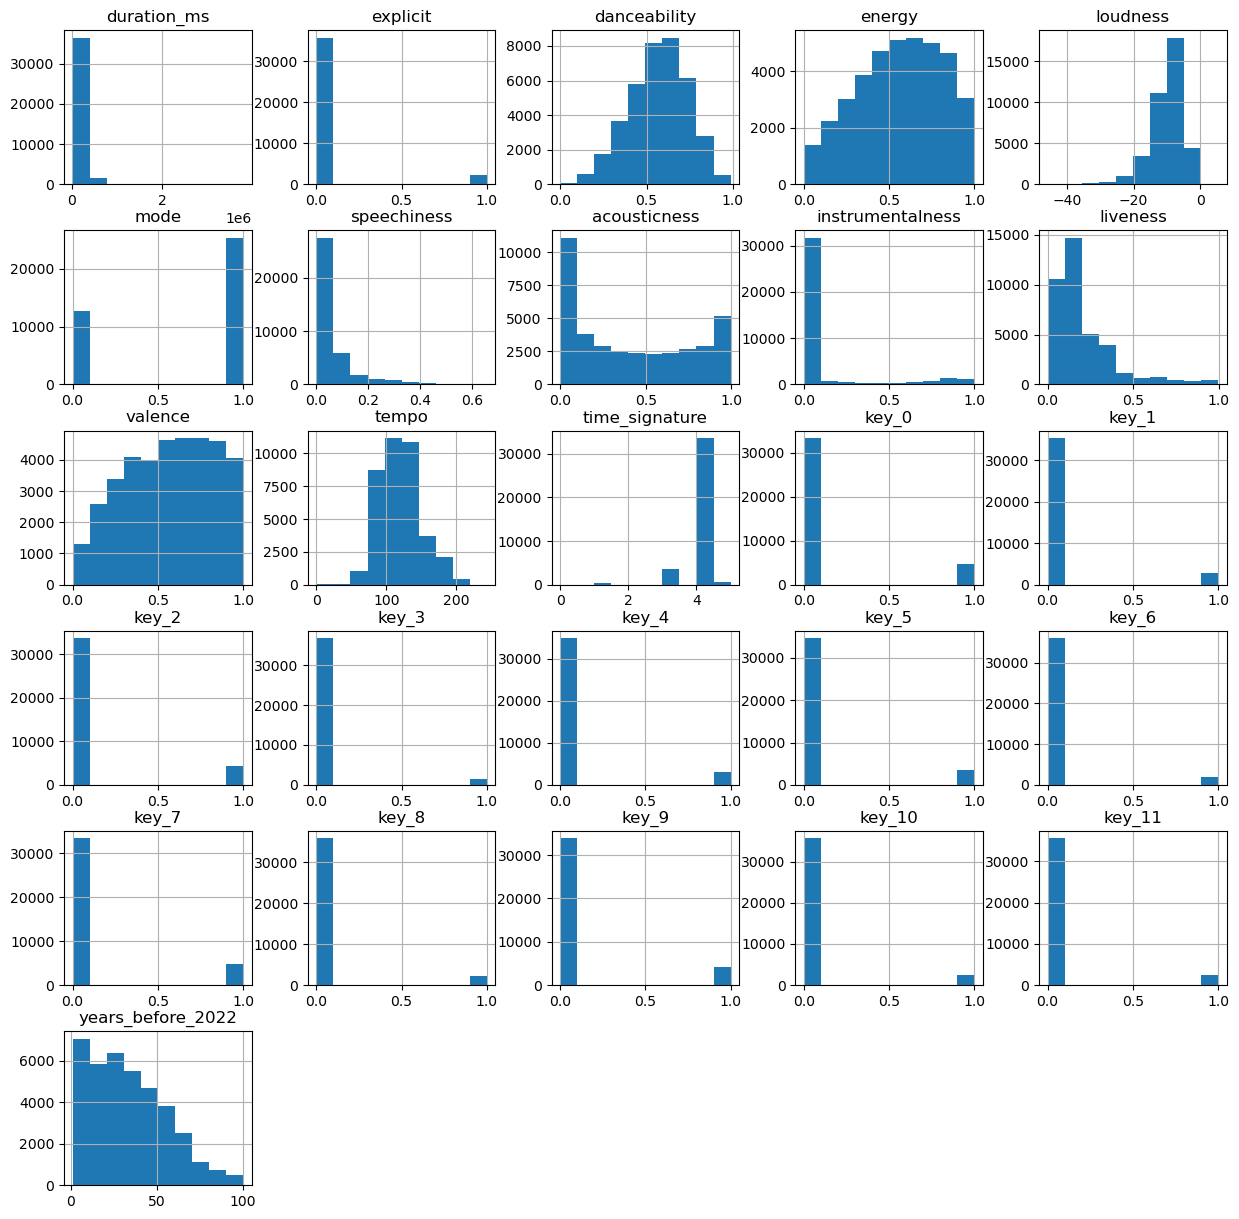

In [884]:
_ = pd.DataFrame.hist(data=hit_song_X, figsize=[15,15])

### Checking correlation so that we can drop features to prevent dimensionality curse

<Axes: >

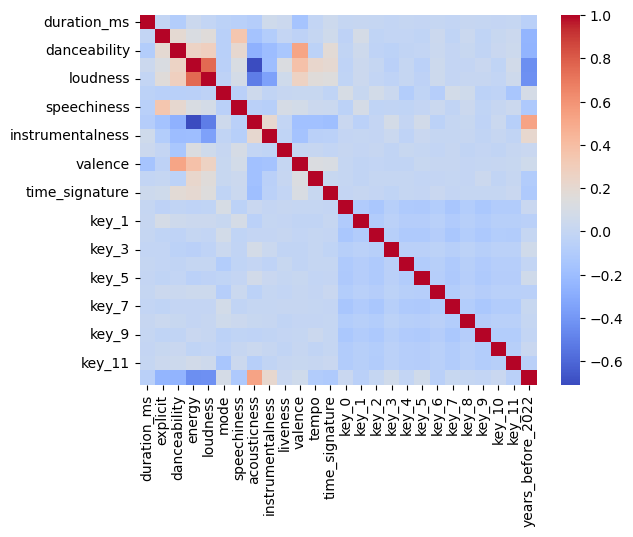

In [885]:
correlation_matrix = hit_song_X.corr()
import seaborn as sns

sns.heatmap(correlation_matrix, cmap="coolwarm")

In [886]:
corr_matrix = correlation_matrix[correlation_matrix != 1.0].dropna(axis=0, how='all').dropna(axis=1, how='all')
corr_pairs = corr_matrix.unstack()

# Sort the correlation pairs by their absolute value in descending order
sorted_pairs = corr_pairs.abs().sort_values(ascending=False)
sorted_pairs

loudness           energy               0.758633
energy             loudness             0.758633
acousticness       energy               0.709078
energy             acousticness         0.709078
years_before_2022  acousticness         0.526542
                                          ...   
key_8              key_8                     NaN
key_9              key_9                     NaN
key_10             key_10                    NaN
key_11             key_11                    NaN
years_before_2022  years_before_2022         NaN
Length: 676, dtype: float64

## Applying models

In [887]:
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


scaler = StandardScaler()
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=2023)


In [888]:
models = []

In [889]:
# Testing adding artists again
# hit_song_X = pd.concat([hit_song_X, artist_dummies], axis=1)
# hit_song_X
hit_song_X.columns

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_0', 'key_1', 'key_2',
       'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'years_before_2022'],
      dtype='object')

In [890]:
zR = DummyClassifier()

steps_zR = [('scaler', scaler), ('estimator', zR)]
pipeline_zR = Pipeline(steps_zR)
scores_zR = cross_val_score(pipeline_zR, hit_song_X, hit_song_y, cv=rkf, scoring='accuracy')
mean_zR = scores_zR.mean()
std_zR = scores_zR.std()
# inf_zR, sup_zR = stats.norm.interval(0.95, loc=mean_zR, 
#                                scale=std_zR/np.sqrt(len(scores_zR)))

print('zR')
print(f'Mean Accuracy: {mean_zR:.2f} Standard Deviation: {std_zR:.2f}')

zR
Mean Accuracy: 0.80 Standard Deviation: 0.00


In [891]:
hit_song_train_df['hit'].value_counts()

0    30470
1     7618
Name: hit, dtype: int64

### Logistic Regression

In [892]:
# import logistic regression
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

steps_lr = [('scaler', scaler), ('estimator', lr)]
pipeline_lr = Pipeline(steps_lr)
grid_lr = {'estimator__C': [0.01, 0.1, 1, 10, 100]}
gs_lr = GridSearchCV(estimator=pipeline_lr, param_grid = grid_lr, 
                  scoring='accuracy', cv = 4)

gs_lr.fit(hit_song_X, hit_song_y)
best_model_lr = gs_lr.best_estimator_

models.append((best_model_lr, 'Logistic Regression'))



### Gaussian Naive Bayes

In [893]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
steps_gnb = [('scaler', scaler), ('estimator', gnb)]
pipeline_gnb = Pipeline(steps_gnb)

pipeline_gnb.fit(hit_song_X, hit_song_y)

models.append((pipeline_gnb, 'Gaussian Naive Bayes'))


### KNN

In [894]:
# Faça o mesmo para knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

steps_knn = [('scaler', scaler), ('estimator', knn)]
pipeline_knn = Pipeline(steps_knn)
grid_knn = {'estimator__n_neighbors': [1, 3, 5, 7, 9, 11, 13]}
gs_knn = GridSearchCV(estimator=pipeline_knn, param_grid = grid_knn,
                    scoring='accuracy', cv = 4)

gs_knn.fit(hit_song_X, hit_song_y)
best_model_knn = gs_knn.best_estimator_

models.append((best_model_knn, 'KNN'))

### Random Forest

In [898]:
# Apply the same code in logistic regression for random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
steps_rf = [('scaler', scaler), ('estimator', rf)]
pipeline_rf = Pipeline(steps_rf)
grid_rf = {'estimator__n_estimators': [10, 50, 100, 200], 'estimator__max_depth': [10, 100, 1000]}
gs_rf = GridSearchCV(estimator=pipeline_rf, param_grid = grid_rf,
                    scoring='accuracy', cv = 4)

gs_rf.fit(hit_song_X, hit_song_y)
best_model_rf = gs_rf.best_estimator_

models.append((best_model_rf, 'Random Forest'))

In [899]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def evaluate_models(models, X_test, y_test):
    results = []
    for model, name in models:
        test_predictions = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)
        test_recall = recall_score(y_test, test_predictions)
        test_precision = precision_score(y_test, test_predictions)
        test_f1 = f1_score(y_test, test_predictions)
        results.append({
            'model': name,
            'accuracy': test_accuracy,
            'recall': test_recall,
            'precision': test_precision,
            'f1': test_f1
        })

        # Plot confusion matrix
        cm = confusion_matrix(y_test, test_predictions)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    return pd.DataFrame(results), test_predictions

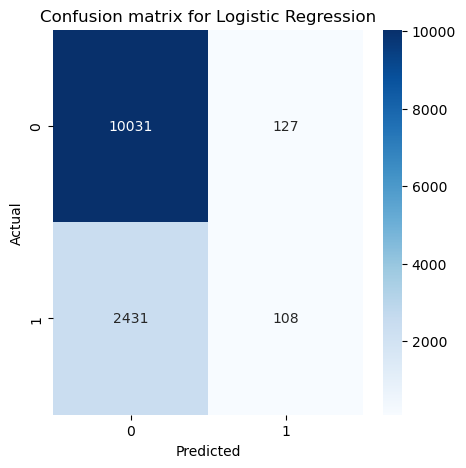

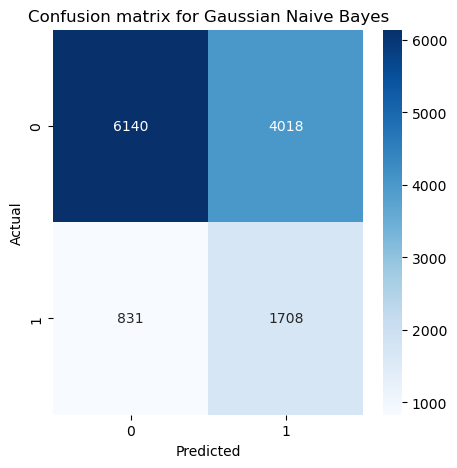

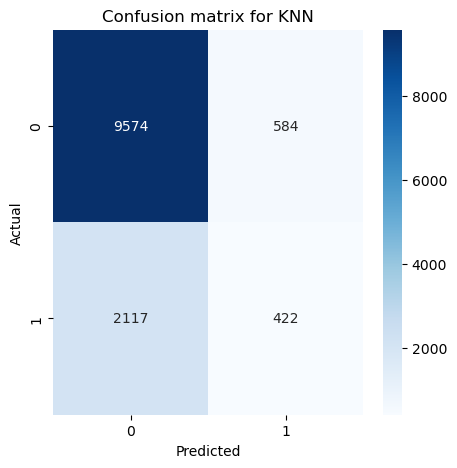

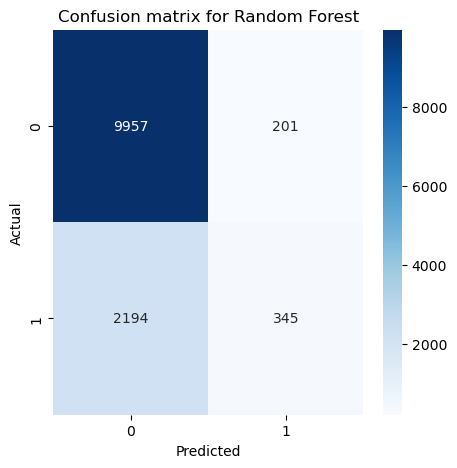

,model,accuracy,recall,precision,f1
0,Logistic Regression,0.798535,0.042536,0.459574,0.077866
1,Gaussian Naive Bayes,0.618099,0.672706,0.298289,0.413309
2,KNN,0.787273,0.166207,0.419483,0.238082
3,Random Forest,0.811373,0.135880,0.631868,0.223663


In [900]:
results, predictions = evaluate_models(models, hit_song_test_df.drop('hit', axis=1), hit_song_test_df['hit'])
results

In [769]:
hit_song_test_df['predicted'] = predictions
incorrect_predictions = hit_song_test_df[hit_song_test_df['hit'] != hit_song_test_df['predicted']]
incorrect_predictions

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,predicted
2784,221293,0,0.635,0.740,-4.439,0,0.0355,0.004650,0.015200,0.1290,...,1,0,0,0,0,0,0,0,0,0
96,219987,0,0.502,0.941,-5.194,1,0.0716,0.000346,0.319000,0.5530,...,0,0,0,0,1,0,0,0,0,0
327,239560,0,0.542,0.822,-7.201,1,0.0291,0.074500,0.009470,0.0645,...,0,0,0,0,0,0,0,0,0,0
7152,430000,0,0.376,0.373,-9.184,0,0.0305,0.827000,0.832000,0.1500,...,0,0,0,0,1,0,0,0,0,0
4528,223847,0,0.623,0.493,-7.727,0,0.0338,0.063200,0.000000,0.1040,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6312,228840,0,0.421,0.476,-7.692,1,0.0298,0.268000,0.000000,0.0816,...,0,0,0,0,0,0,0,0,0,0
851,137080,0,0.623,0.495,-11.564,1,0.0343,0.368000,0.000000,0.2970,...,0,0,0,0,0,0,0,0,0,0
6314,191410,1,0.868,0.657,-4.853,1,0.1130,0.015800,0.000000,0.0995,...,0,0,0,0,0,1,0,0,0,0
2238,276067,0,0.590,0.699,-7.529,0,0.0790,0.003890,0.000047,0.0577,...,0,0,0,0,0,0,0,0,1,0


In [770]:
incorrect_predictions.loc[incorrect_predictions['speechiness'] == 0]

,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,predicted
7115,148547,0,0.0,0.506,-9.923,0,0.0,0.912,0.00000,0.310,...,0,0,0,0,1,0,0,0,0,0
4637,147000,0,0.0,0.405,-9.935,1,0.0,0.842,0.00114,0.198,...,0,0,0,0,0,0,0,0,0,0


In [771]:
incorrect_indices = incorrect_predictions.index
concatenated_df.loc[incorrect_indices].loc[concatenated_df['artist'] == 'BTS']

,name,duration_ms,explicit,release_date,danceability,energy,loudness,mode,speechiness,acousticness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
9534,DNA,223123,0,2017-09-18,0.598,0.775,-4.035,0,0.0545,0.022,...,0,0,0,0,0,0,0,0,0,0


In [772]:
incorrect_predictions['famous_before_release'].value_counts()

0    997
Name: famous_before_release, dtype: int64

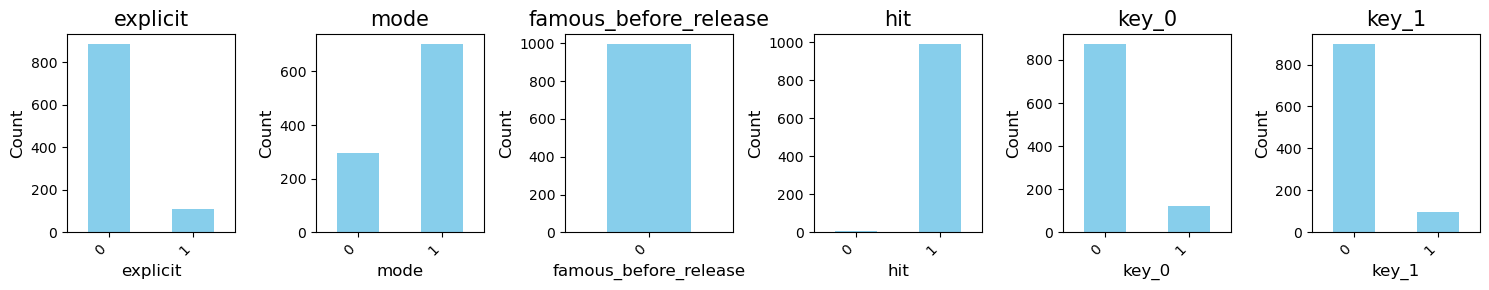

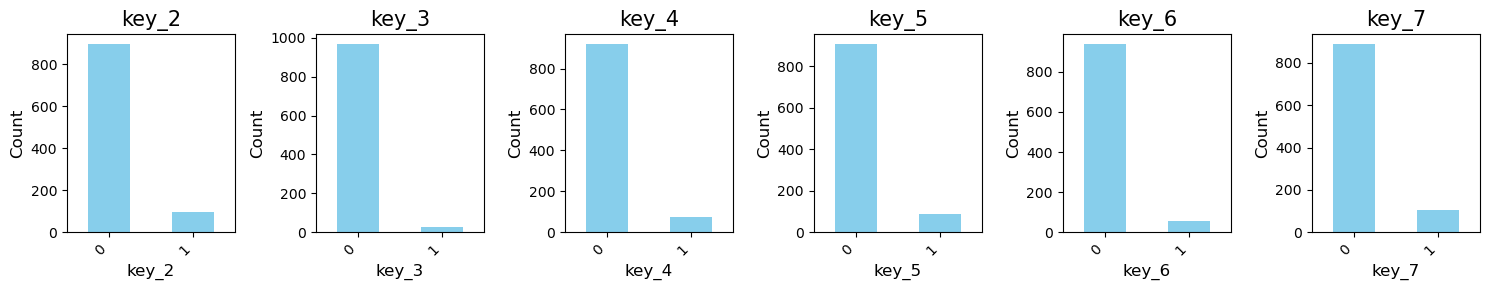

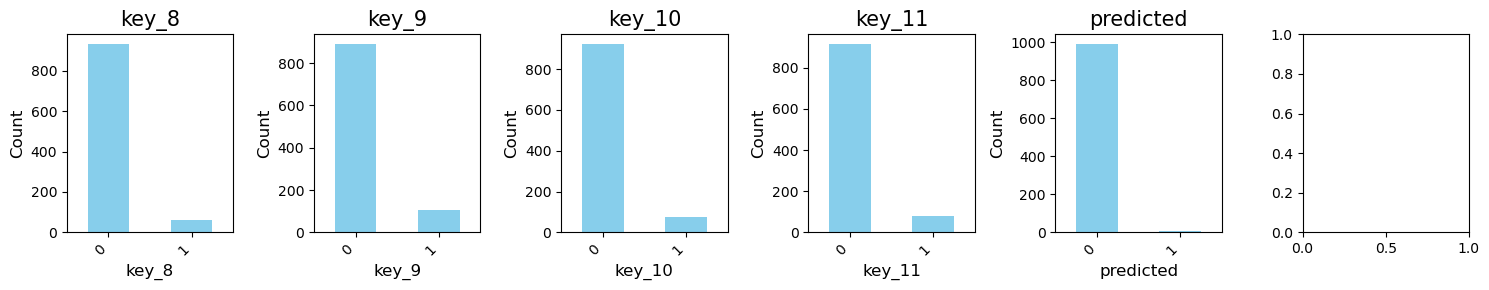

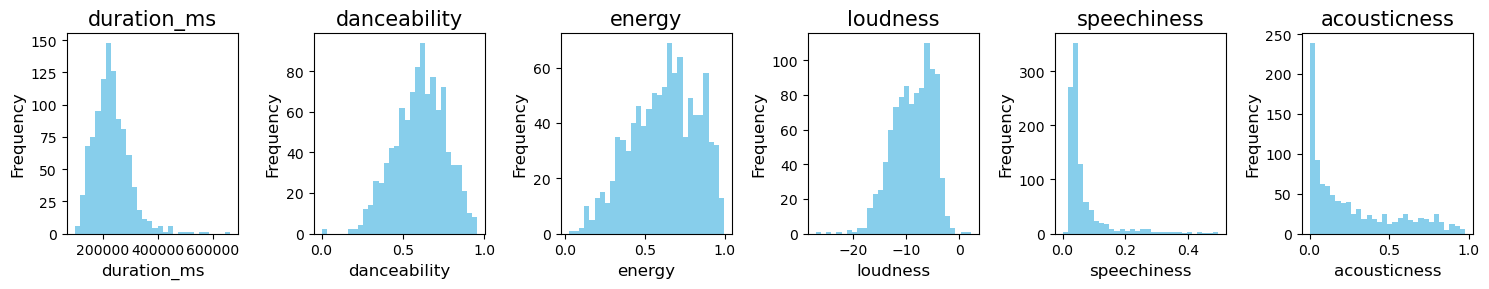

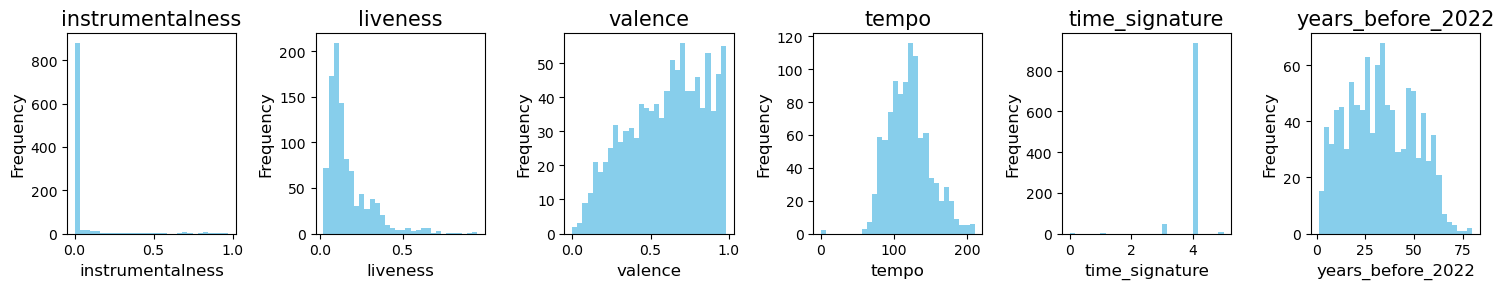

In [773]:
import numpy as np

# List of categorical columns
categorical_columns = incorrect_predictions.select_dtypes(include=[np.uint8]).columns
# print(categorical_columns)
# List of numerical columns
numerical_columns = incorrect_predictions.select_dtypes(include=[np.float64, np.int64]).columns

plots_per_row = 6

for i in range(0, len(categorical_columns), plots_per_row):
    fig, axs = plt.subplots(1, plots_per_row, figsize=(15, 3))
    for j, column in enumerate(categorical_columns[i:i+plots_per_row]):
        incorrect_predictions[column].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=axs[j])
        axs[j].set_title(f'{column}', fontsize=15)
        axs[j].set_xlabel(column, fontsize=12)
        axs[j].set_ylabel('Count', fontsize=12)
        plt.setp(axs[j].xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for i in range(0, len(numerical_columns), plots_per_row):
    fig, axs = plt.subplots(1, plots_per_row, figsize=(15, 3))
    for j, column in enumerate(numerical_columns[i:i+plots_per_row]):
        incorrect_predictions[column].plot(kind='hist', bins=30, color='skyblue', ax=axs[j])
        axs[j].set_title(f'{column}', fontsize=15)
        axs[j].set_xlabel(column, fontsize=12)
        axs[j].set_ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

In [776]:
hit_song_df.dtypes

duration_ms                int64
explicit                   uint8
danceability             float64
energy                   float64
loudness                 float64
mode                       uint8
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
time_signature             int64
famous_before_release      uint8
hit                        uint8
years_before_2022          int64
key_0                      uint8
key_1                      uint8
key_2                      uint8
key_3                      uint8
key_4                      uint8
key_5                      uint8
key_6                      uint8
key_7                      uint8
key_8                      uint8
key_9                      uint8
key_10                     uint8
key_11                     uint8
dtype: object

Index(['explicit', 'mode', 'famous_before_release', 'hit', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11'],
      dtype='object')


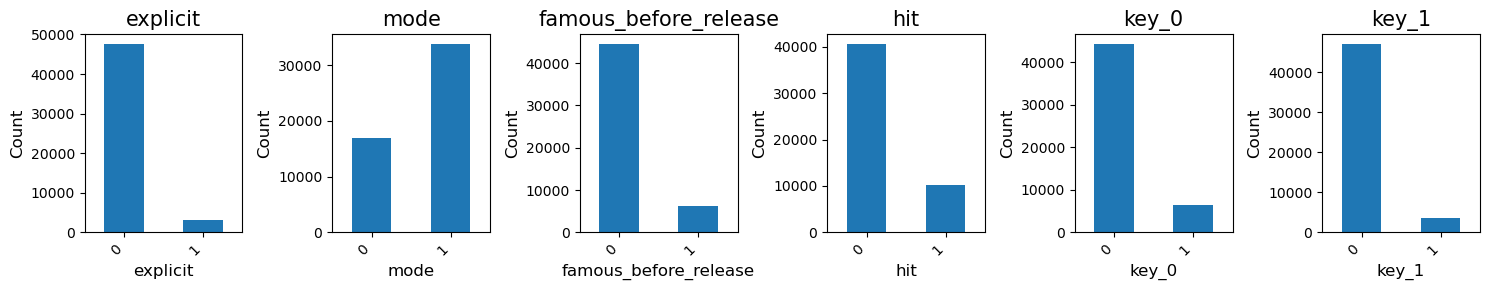

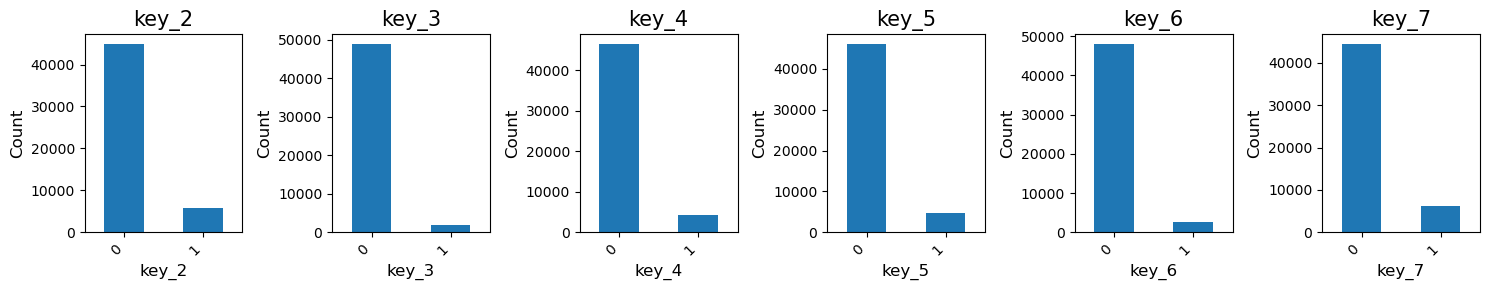

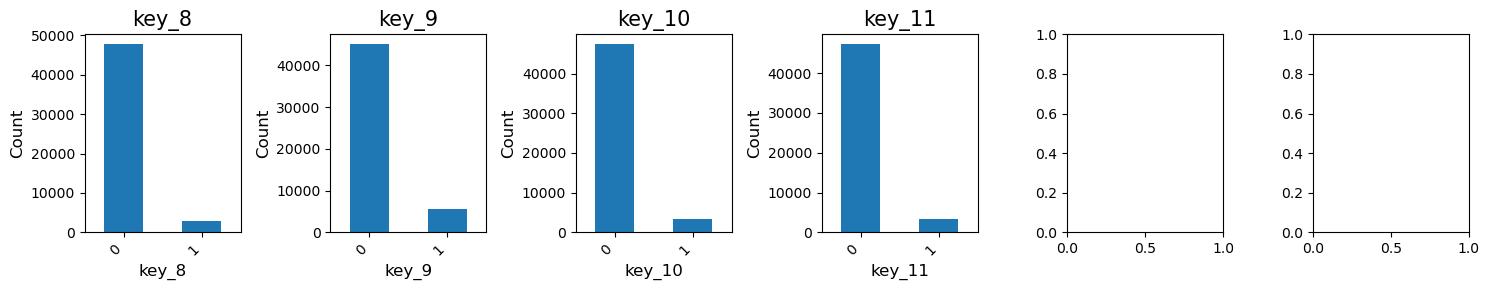

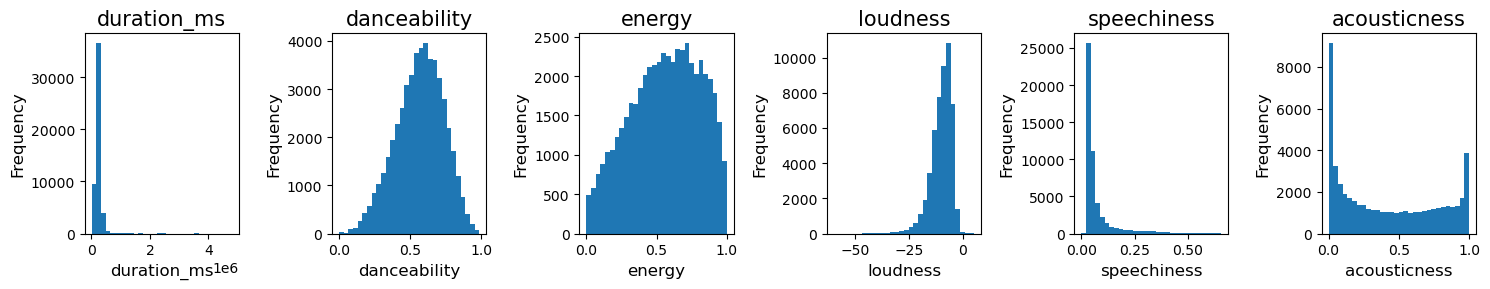

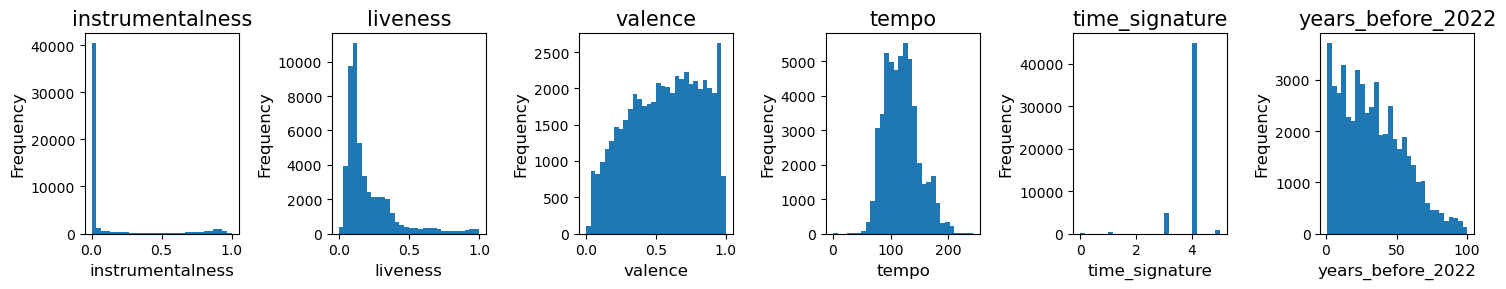

In [777]:
# Assuming incorrect_predictions is your DataFrame

# List of categorical columns
categorical_columns = hit_song_df.select_dtypes(include=[np.uint8]).columns
print(categorical_columns)
# List of numerical columns
numerical_columns = hit_song_df.select_dtypes(include=[np.float64, np.int64]).columns

plots_per_row = 6

for i in range(0, len(categorical_columns), plots_per_row):
    fig, axs = plt.subplots(1, plots_per_row, figsize=(15, 3))
    for j, column in enumerate(categorical_columns[i:i+plots_per_row]):
        hit_song_df[column].value_counts().sort_index().plot(kind='bar', ax=axs[j])
        axs[j].set_title(f'{column}', fontsize=15)
        axs[j].set_xlabel(column, fontsize=12)
        axs[j].set_ylabel('Count', fontsize=12)
        plt.setp(axs[j].xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for i in range(0, len(numerical_columns), plots_per_row):
    fig, axs = plt.subplots(1, plots_per_row, figsize=(15, 3))
    for j, column in enumerate(numerical_columns[i:i+plots_per_row]):
        hit_song_df[column].plot(kind='hist', bins=30, ax=axs[j])
        axs[j].set_title(f'{column}', fontsize=15)
        axs[j].set_xlabel(column, fontsize=12)
        axs[j].set_ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

In [788]:
incorrect_predictions_after_2000 = incorrect_predictions[incorrect_predictions['years_before_2022'] <= 22]

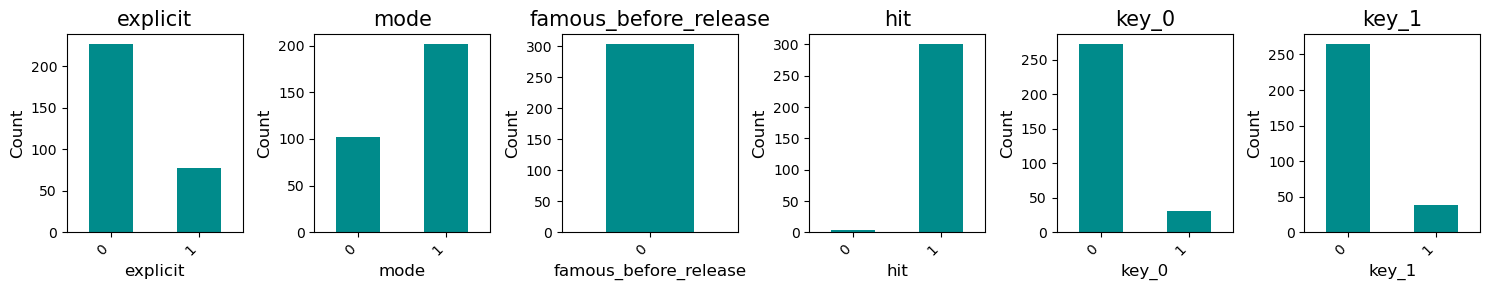

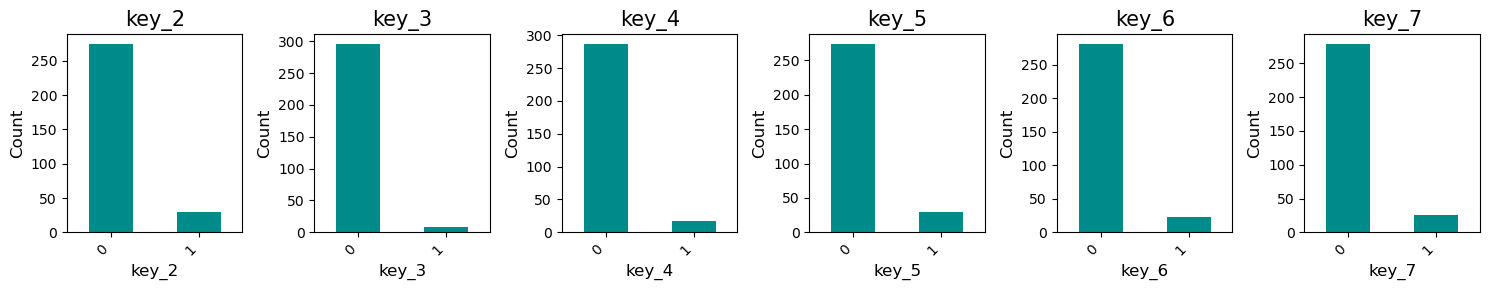

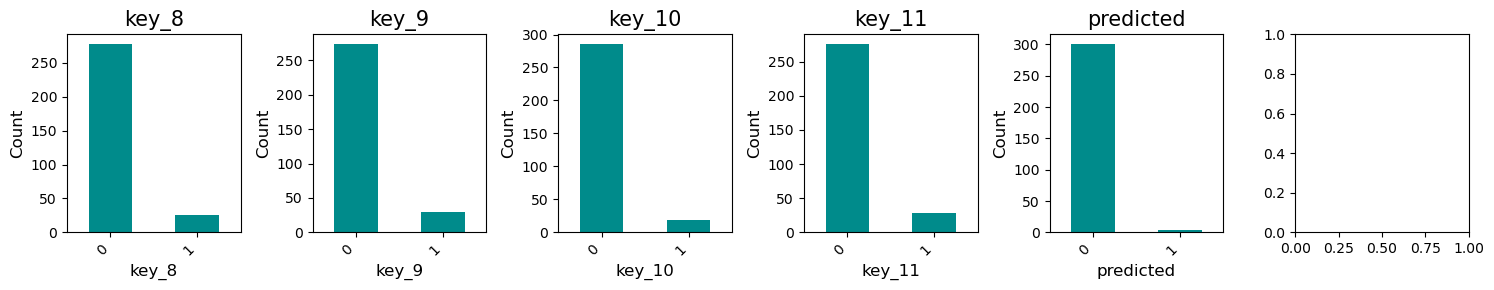

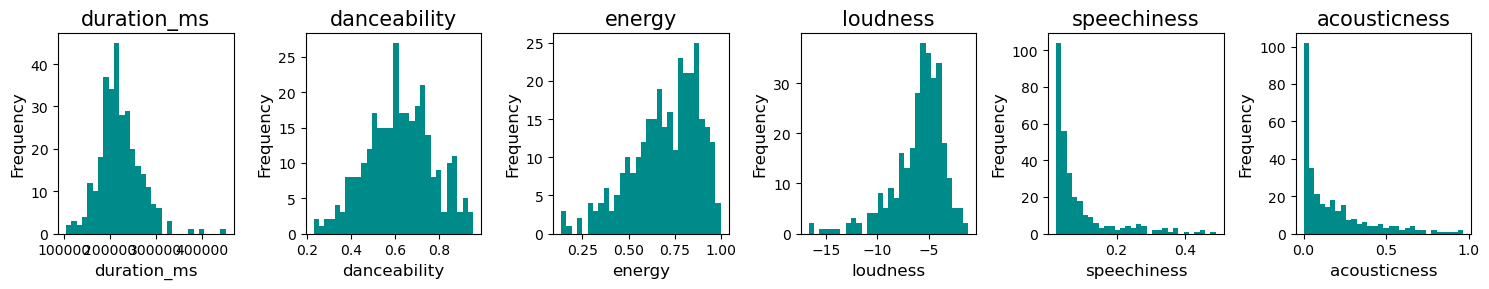

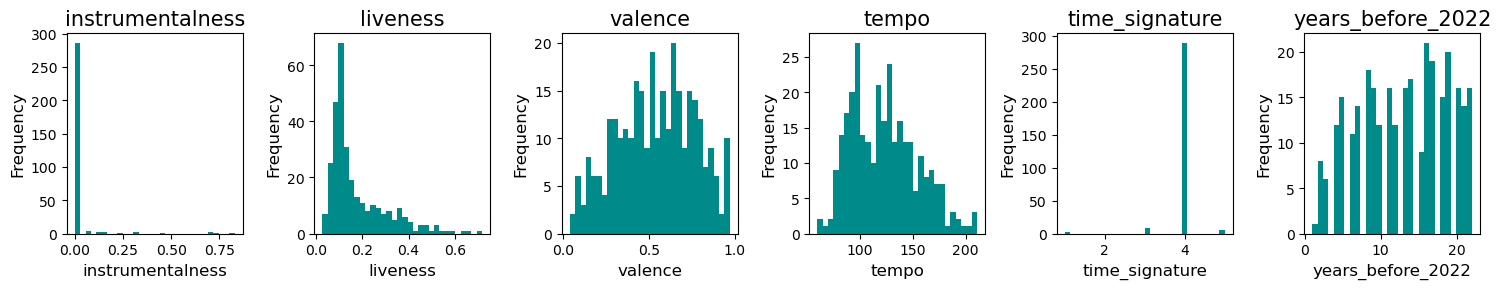

In [789]:

# List of categorical columns
categorical_columns = incorrect_predictions_after_2000.select_dtypes(include=[np.uint8]).columns
# print(categorical_columns)
# List of numerical columns
numerical_columns = incorrect_predictions_after_2000.select_dtypes(include=[np.float64, np.int64]).columns

plots_per_row = 6

for i in range(0, len(categorical_columns), plots_per_row):
    fig, axs = plt.subplots(1, plots_per_row, figsize=(15, 3))
    for j, column in enumerate(categorical_columns[i:i+plots_per_row]):
        incorrect_predictions_after_2000[column].value_counts().sort_index().plot(kind='bar', color='darkcyan', ax=axs[j])
        axs[j].set_title(f'{column}', fontsize=15)
        axs[j].set_xlabel(column, fontsize=12)
        axs[j].set_ylabel('Count', fontsize=12)
        plt.setp(axs[j].xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for i in range(0, len(numerical_columns), plots_per_row):
    fig, axs = plt.subplots(1, plots_per_row, figsize=(15, 3))
    for j, column in enumerate(numerical_columns[i:i+plots_per_row]):
        incorrect_predictions_after_2000[column].plot(kind='hist', bins=30, color='darkcyan', ax=axs[j])
        axs[j].set_title(f'{column}', fontsize=15)
        axs[j].set_xlabel(column, fontsize=12)
        axs[j].set_ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

In [793]:
hit_song_df_hits = hit_song_df[hit_song_df['hit'] == 1]
hit_song_df_hits['hit'].value_counts()

1    10157
Name: hit, dtype: int64

Index(['explicit', 'mode', 'famous_before_release', 'hit', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11'],
      dtype='object')


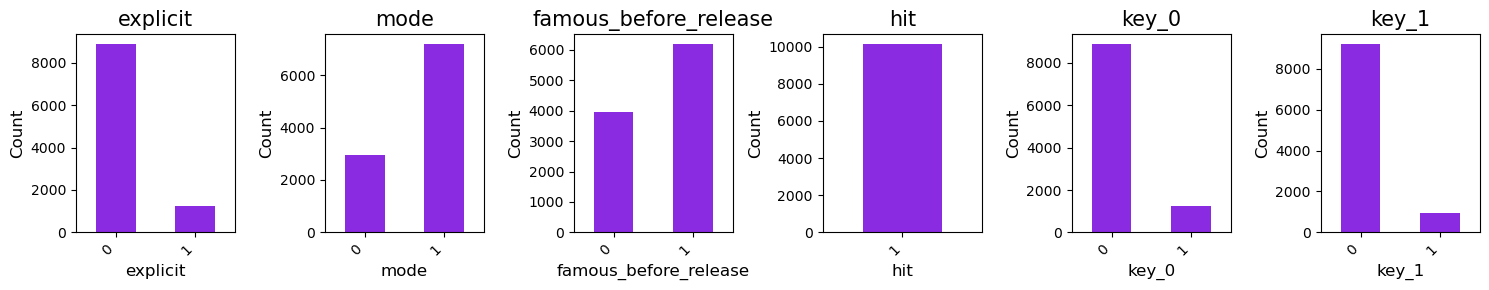

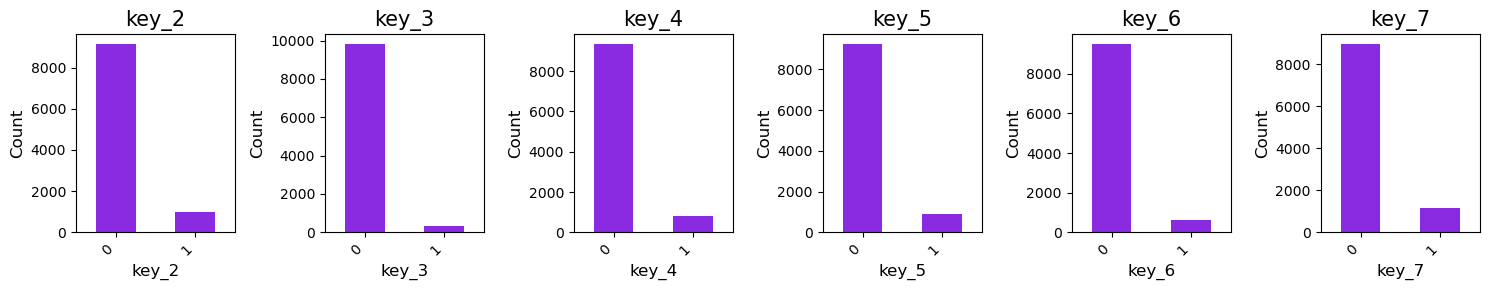

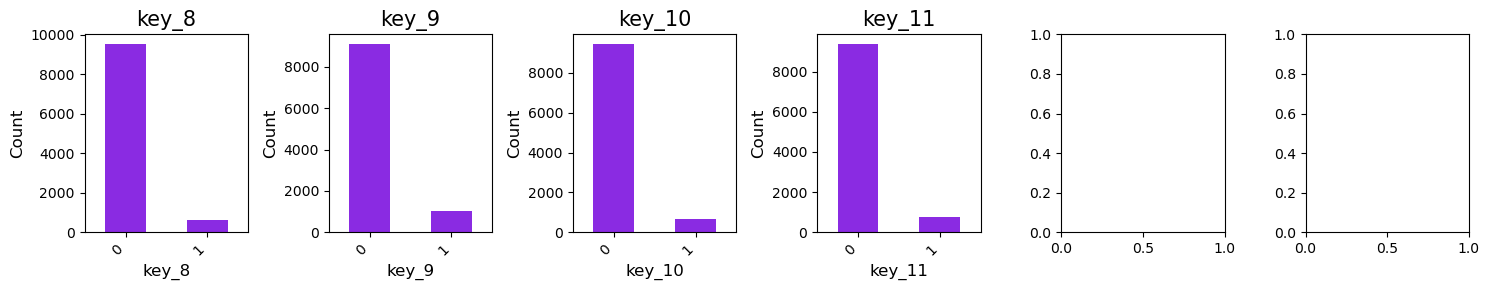

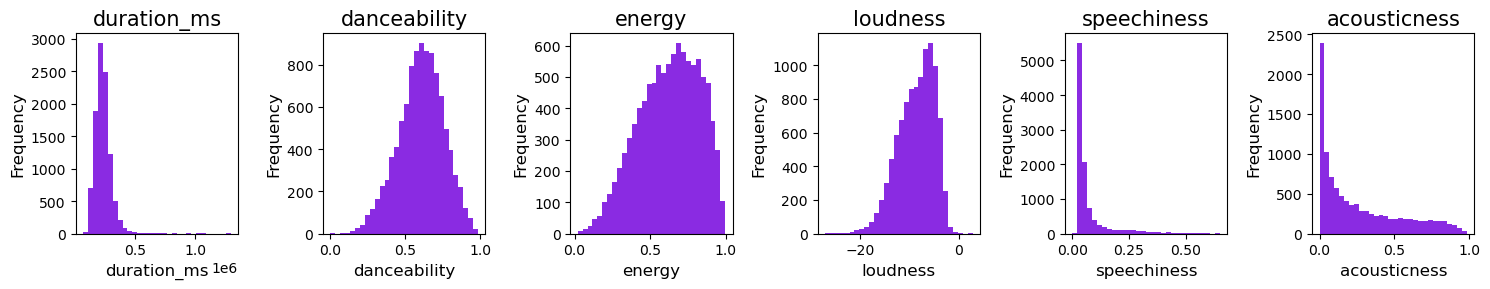

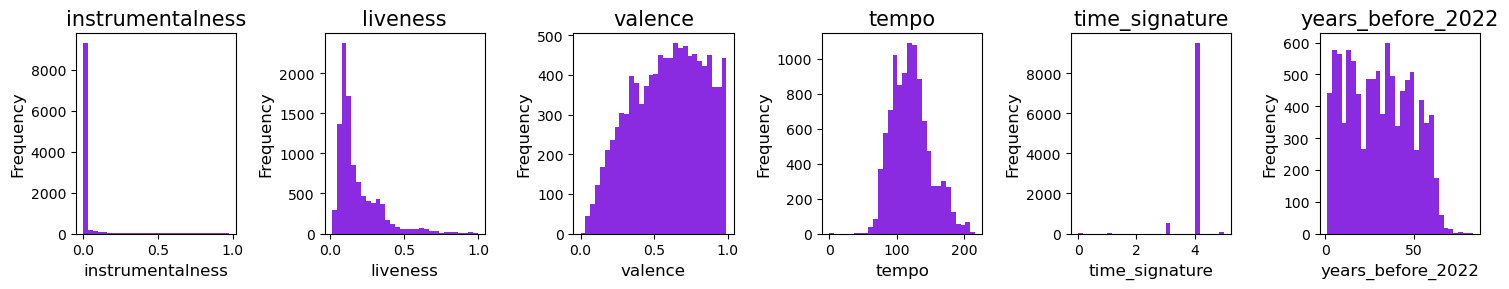

In [792]:
# Assuming incorrect_predictions is your DataFrame

# List of categorical columns
categorical_columns = hit_song_df_hits.select_dtypes(include=[np.uint8]).columns
print(categorical_columns)
# List of numerical columns
numerical_columns = hit_song_df_hits.select_dtypes(include=[np.float64, np.int64]).columns

plots_per_row = 6

for i in range(0, len(categorical_columns), plots_per_row):
    fig, axs = plt.subplots(1, plots_per_row, figsize=(15, 3))
    for j, column in enumerate(categorical_columns[i:i+plots_per_row]):
        hit_song_df_hits[column].value_counts().sort_index().plot(kind='bar', color='blueviolet', ax=axs[j])
        axs[j].set_title(f'{column}', fontsize=15)
        axs[j].set_xlabel(column, fontsize=12)
        axs[j].set_ylabel('Count', fontsize=12)
        plt.setp(axs[j].xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for i in range(0, len(numerical_columns), plots_per_row):
    fig, axs = plt.subplots(1, plots_per_row, figsize=(15, 3))
    for j, column in enumerate(numerical_columns[i:i+plots_per_row]):
        hit_song_df_hits[column].plot(kind='hist', color='blueviolet', bins=30, ax=axs[j])
        axs[j].set_title(f'{column}', fontsize=15)
        axs[j].set_xlabel(column, fontsize=12)
        axs[j].set_ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

In [799]:
hit_song_test_df_hits = hit_song_test_df[hit_song_test_df['hit'] == 1]
hit_song_test_df_hits['famous_before_release'].value_counts()

1    1536
0    1003
Name: famous_before_release, dtype: int64

Index(['explicit', 'mode', 'famous_before_release', 'hit', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'predicted'],
      dtype='object')


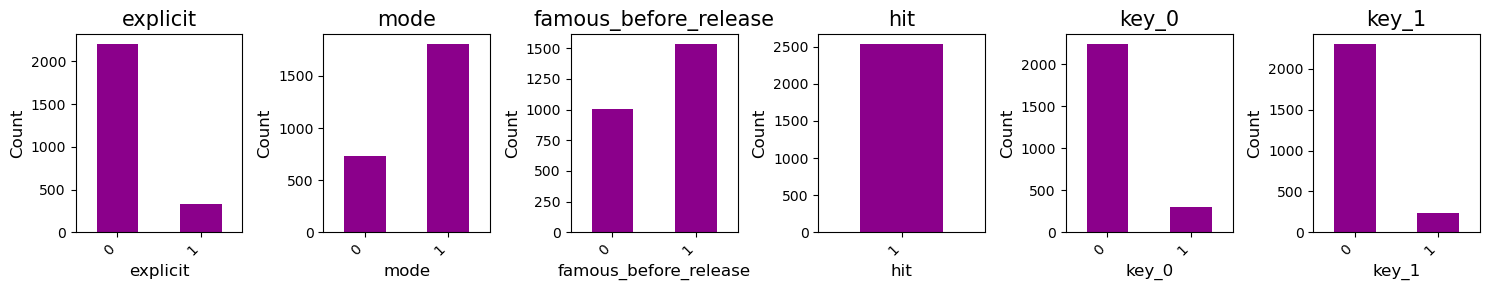

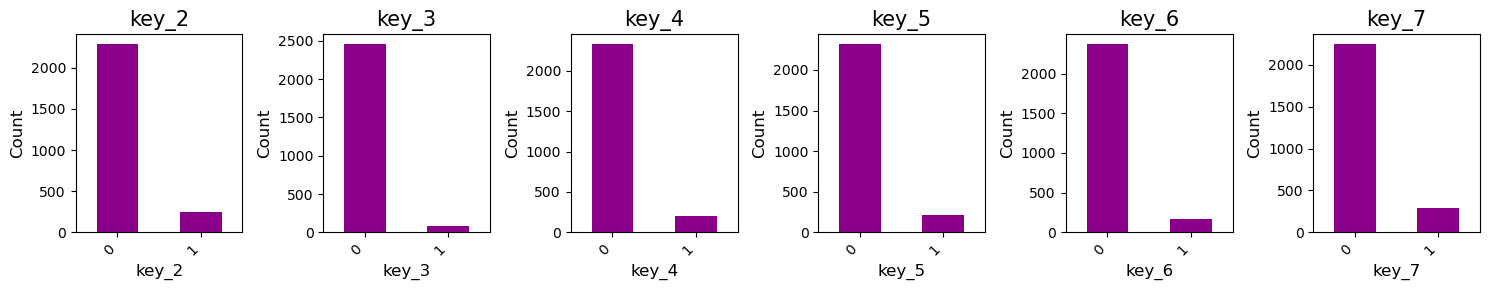

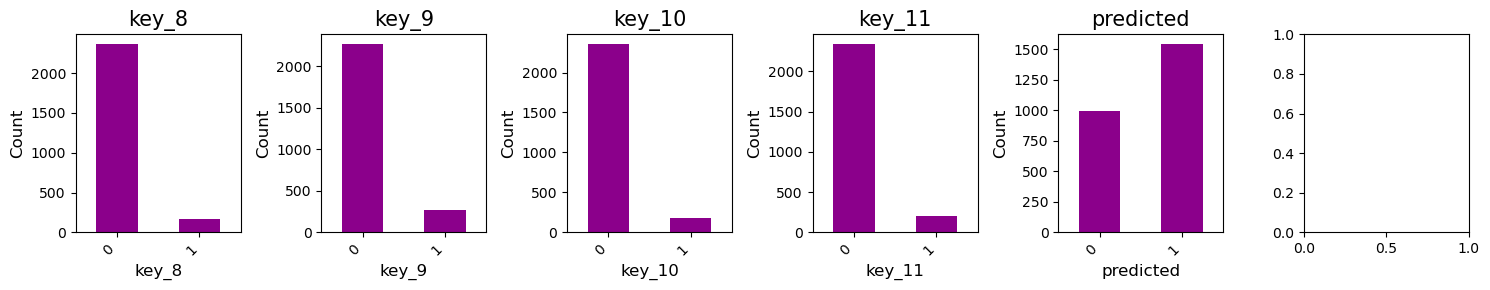

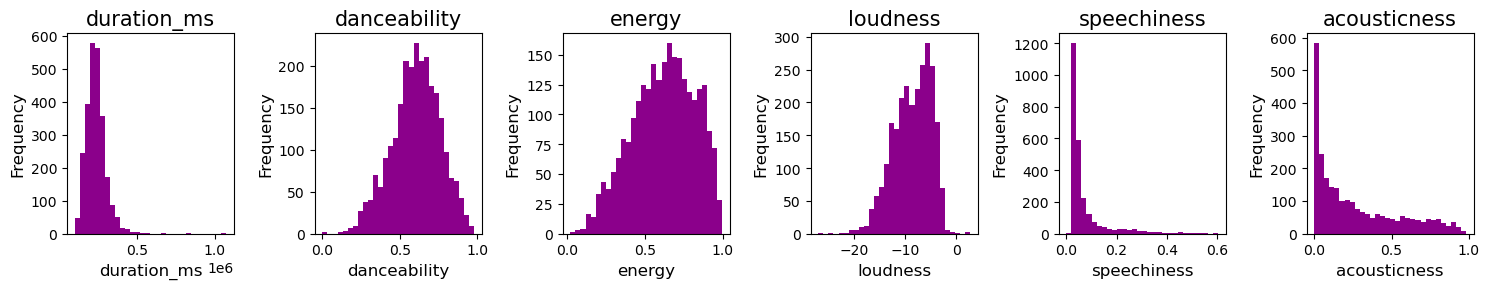

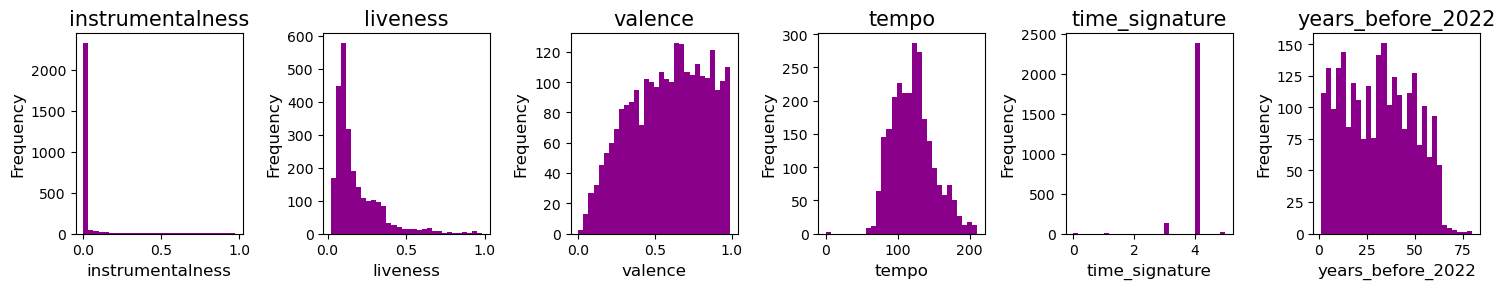

In [797]:
# Assuming incorrect_predictions is your DataFrame

# List of categorical columns
categorical_columns = hit_song_test_df_hits.select_dtypes(include=[np.uint8]).columns
print(categorical_columns)
# List of numerical columns
numerical_columns = hit_song_test_df_hits.select_dtypes(include=[np.float64, np.int64]).columns

plots_per_row = 6

for i in range(0, len(categorical_columns), plots_per_row):
    fig, axs = plt.subplots(1, plots_per_row, figsize=(15, 3))
    for j, column in enumerate(categorical_columns[i:i+plots_per_row]):
        hit_song_test_df_hits[column].value_counts().sort_index().plot(kind='bar', color='darkmagenta', ax=axs[j])
        axs[j].set_title(f'{column}', fontsize=15)
        axs[j].set_xlabel(column, fontsize=12)
        axs[j].set_ylabel('Count', fontsize=12)
        plt.setp(axs[j].xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for i in range(0, len(numerical_columns), plots_per_row):
    fig, axs = plt.subplots(1, plots_per_row, figsize=(15, 3))
    for j, column in enumerate(numerical_columns[i:i+plots_per_row]):
        hit_song_test_df_hits[column].plot(kind='hist', color='darkmagenta', bins=30, ax=axs[j])
        axs[j].set_title(f'{column}', fontsize=15)
        axs[j].set_xlabel(column, fontsize=12)
        axs[j].set_ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

###